In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

### Reading data set

In [3]:
data=pd.read_csv('Company_Data.csv')
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
data['Sales'].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

#### Categorizing sales column with low sales=0, medium sales=1, high sales=2

In [6]:
def f(sales):
    if sales < 7:
        return '0'
    elif sales >= 7 and sales<=12:
        return '1'
    elif sales > 12:
        return '2'
    else:
        pass

In [7]:
d=data['Sales'].apply(f)

In [8]:
data['Sales']=d

In [9]:
sales_df=data
sales_df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,Bad,42,17,Yes,Yes
1,1,111,48,16,260,83,Good,65,10,Yes,Yes
2,1,113,35,10,269,80,Medium,59,12,Yes,Yes
3,1,117,100,4,466,97,Medium,55,14,Yes,Yes
4,0,141,64,3,340,128,Bad,38,13,Yes,No


In [10]:
x=sales_df.iloc[:,1:]
y=sales_df['Sales']

In [11]:
x=pd.get_dummies(x,columns=['Urban','US'], drop_first=True)
x['ShelveLoc']=x['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,138,73,11,276,120,3,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,3,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,3,50,12,1,1


In [12]:
y

0      1
1      1
2      1
3      1
4      0
      ..
395    2
396    0
397    1
398    0
399    1
Name: Sales, Length: 400, dtype: object

In [13]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=42)

In [14]:
print(x_train.shape, x_test.shape,y_train.shape,y_test.shape)

(280, 10) (120, 10) (280,) (120,)


## Decision tree classifier using Entropy criteria

In [15]:
model1 = DecisionTreeClassifier(criterion = 'entropy',max_depth=5,min_samples_split=2,min_samples_leaf=1,max_features='log2')
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='log2')

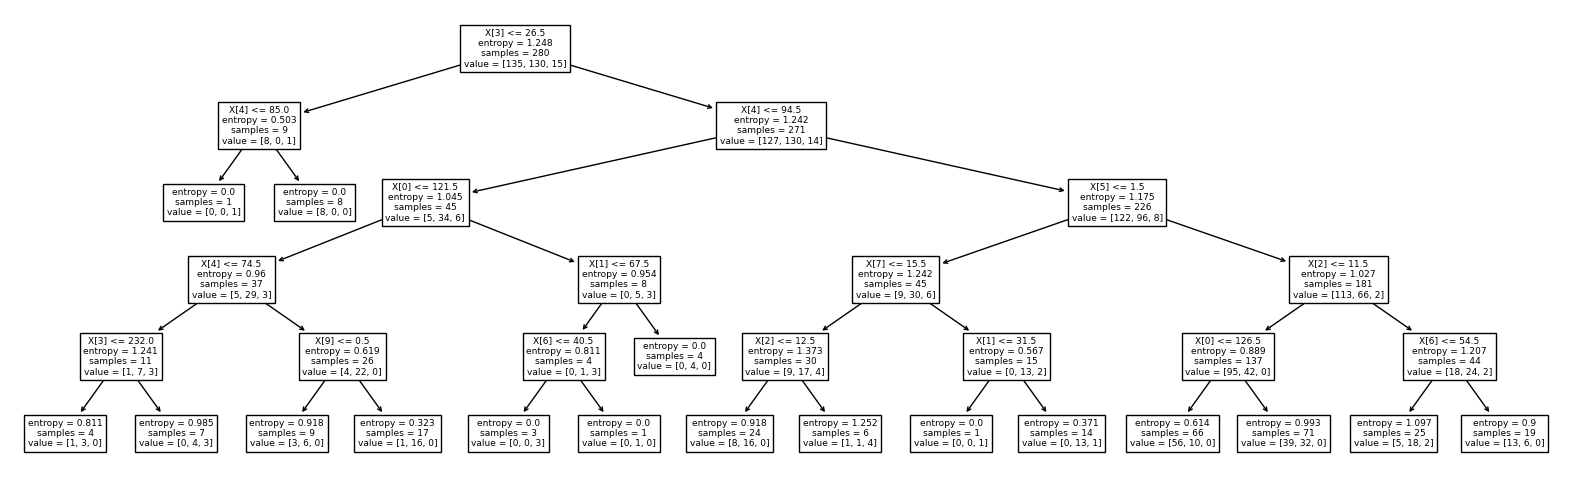

In [16]:
plt.figure(figsize =(20, 6)) 
tree.plot_tree(model1);

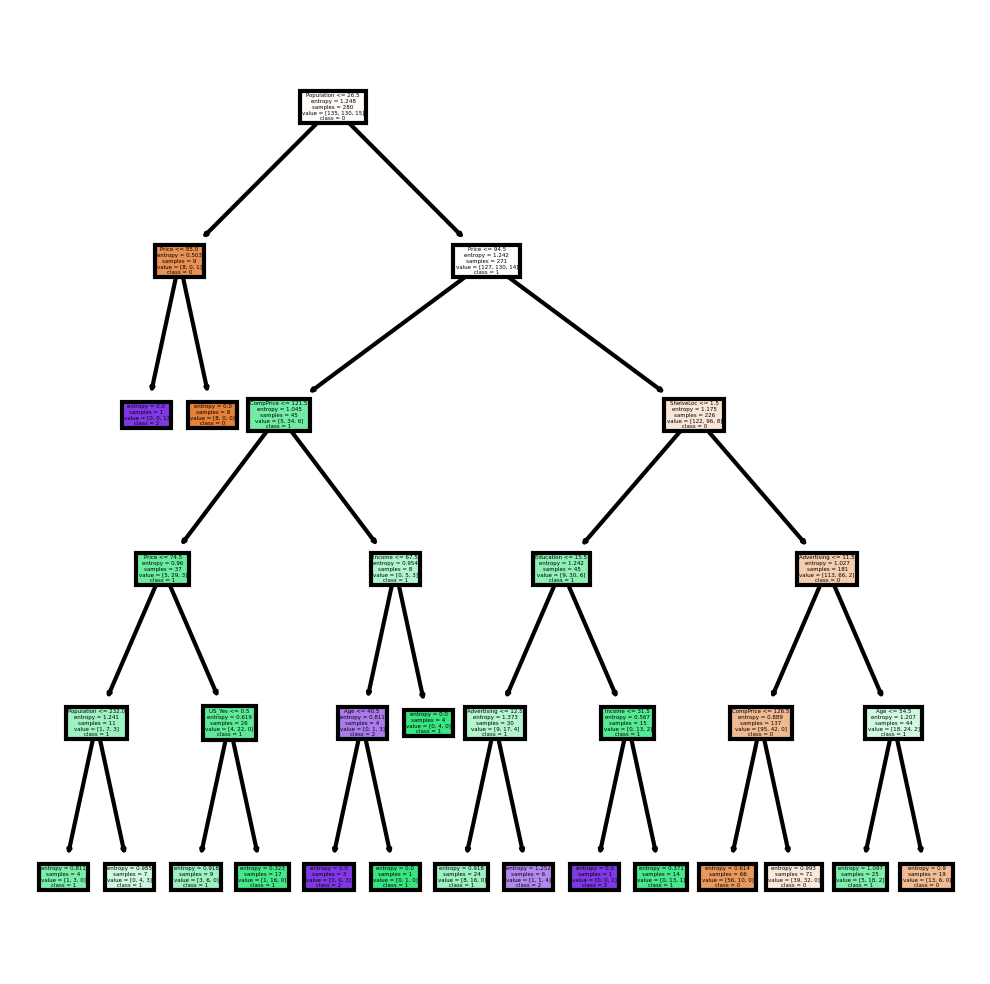

In [17]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban_Yes', 'US_Yes']
cn=['0', '1', '2']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model1,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [18]:
preds = model1.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

0    63
1    52
2     5
dtype: int64

In [19]:
pd.crosstab(y_test,preds)

col_0,0,1,2
Sales,,,
0,42,7,0
1,20,36,3
2,1,9,2


In [20]:
np.mean(preds==y_test)

0.6666666666666666

In [21]:
important_features = model1.feature_importances_
important_features

array([0.10889363, 0.05690312, 0.16698957, 0.08734892, 0.25212606,
       0.17686822, 0.08759643, 0.0458688 , 0.        , 0.01740523])

In [22]:
important_features_df=pd.DataFrame(important_features,columns=['importance'])
important_features_df['features']=pd.DataFrame(x.columns)
important_features_df

,importance,features
0,0.108894,CompPrice
1,0.056903,Income
2,0.166990,Advertising
3,0.087349,Population
4,0.252126,Price
5,0.176868,ShelveLoc
6,0.087596,Age
7,0.045869,Education
8,0.000000,Urban_Yes
9,0.017405,US_Yes


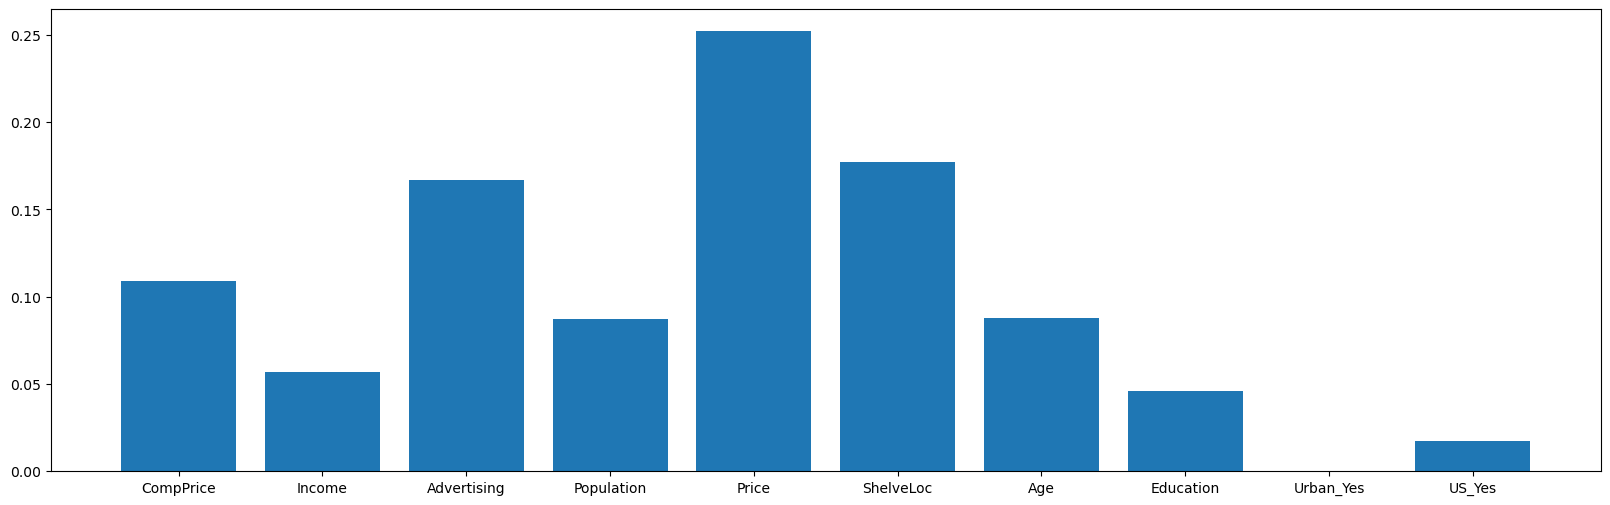

In [23]:
plt.figure(figsize =(20, 6))

plt.bar(important_features_df['features'], important_features_df['importance'], orientation = 'vertical');


## Decision tree classifier using Gini impurity

In [76]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=5,min_samples_split=2,min_samples_leaf=1,max_features='log2')

In [77]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, max_features='log2')

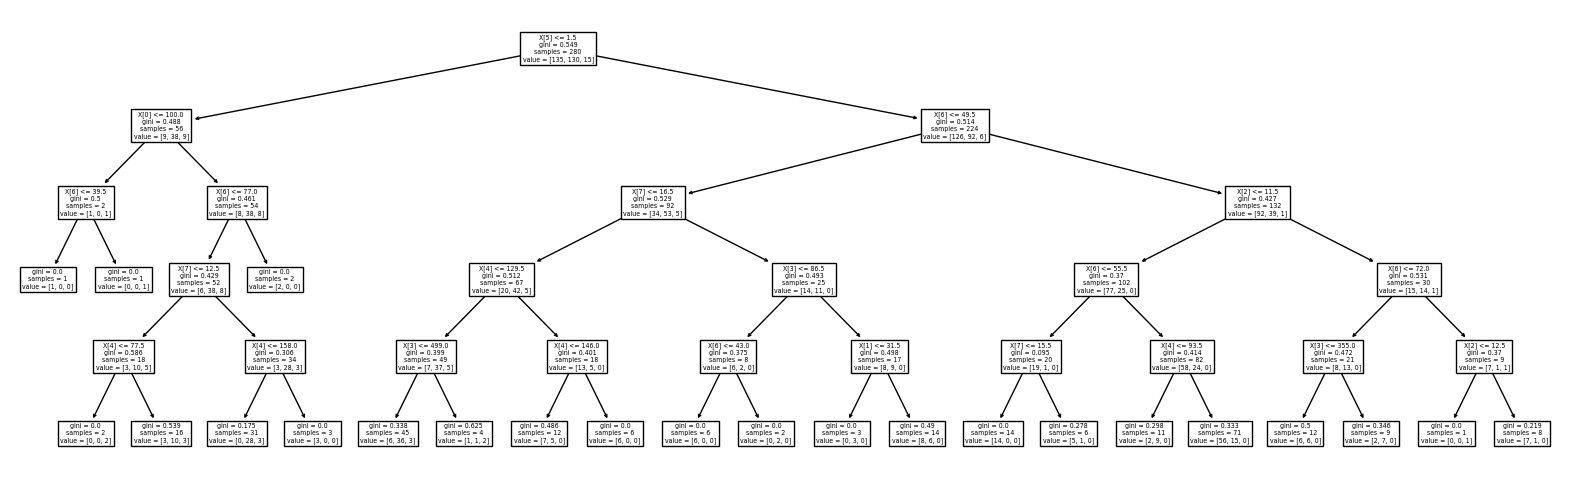

In [78]:
plt.figure(figsize =(20, 6)) 
tree.plot_tree(model_gini);

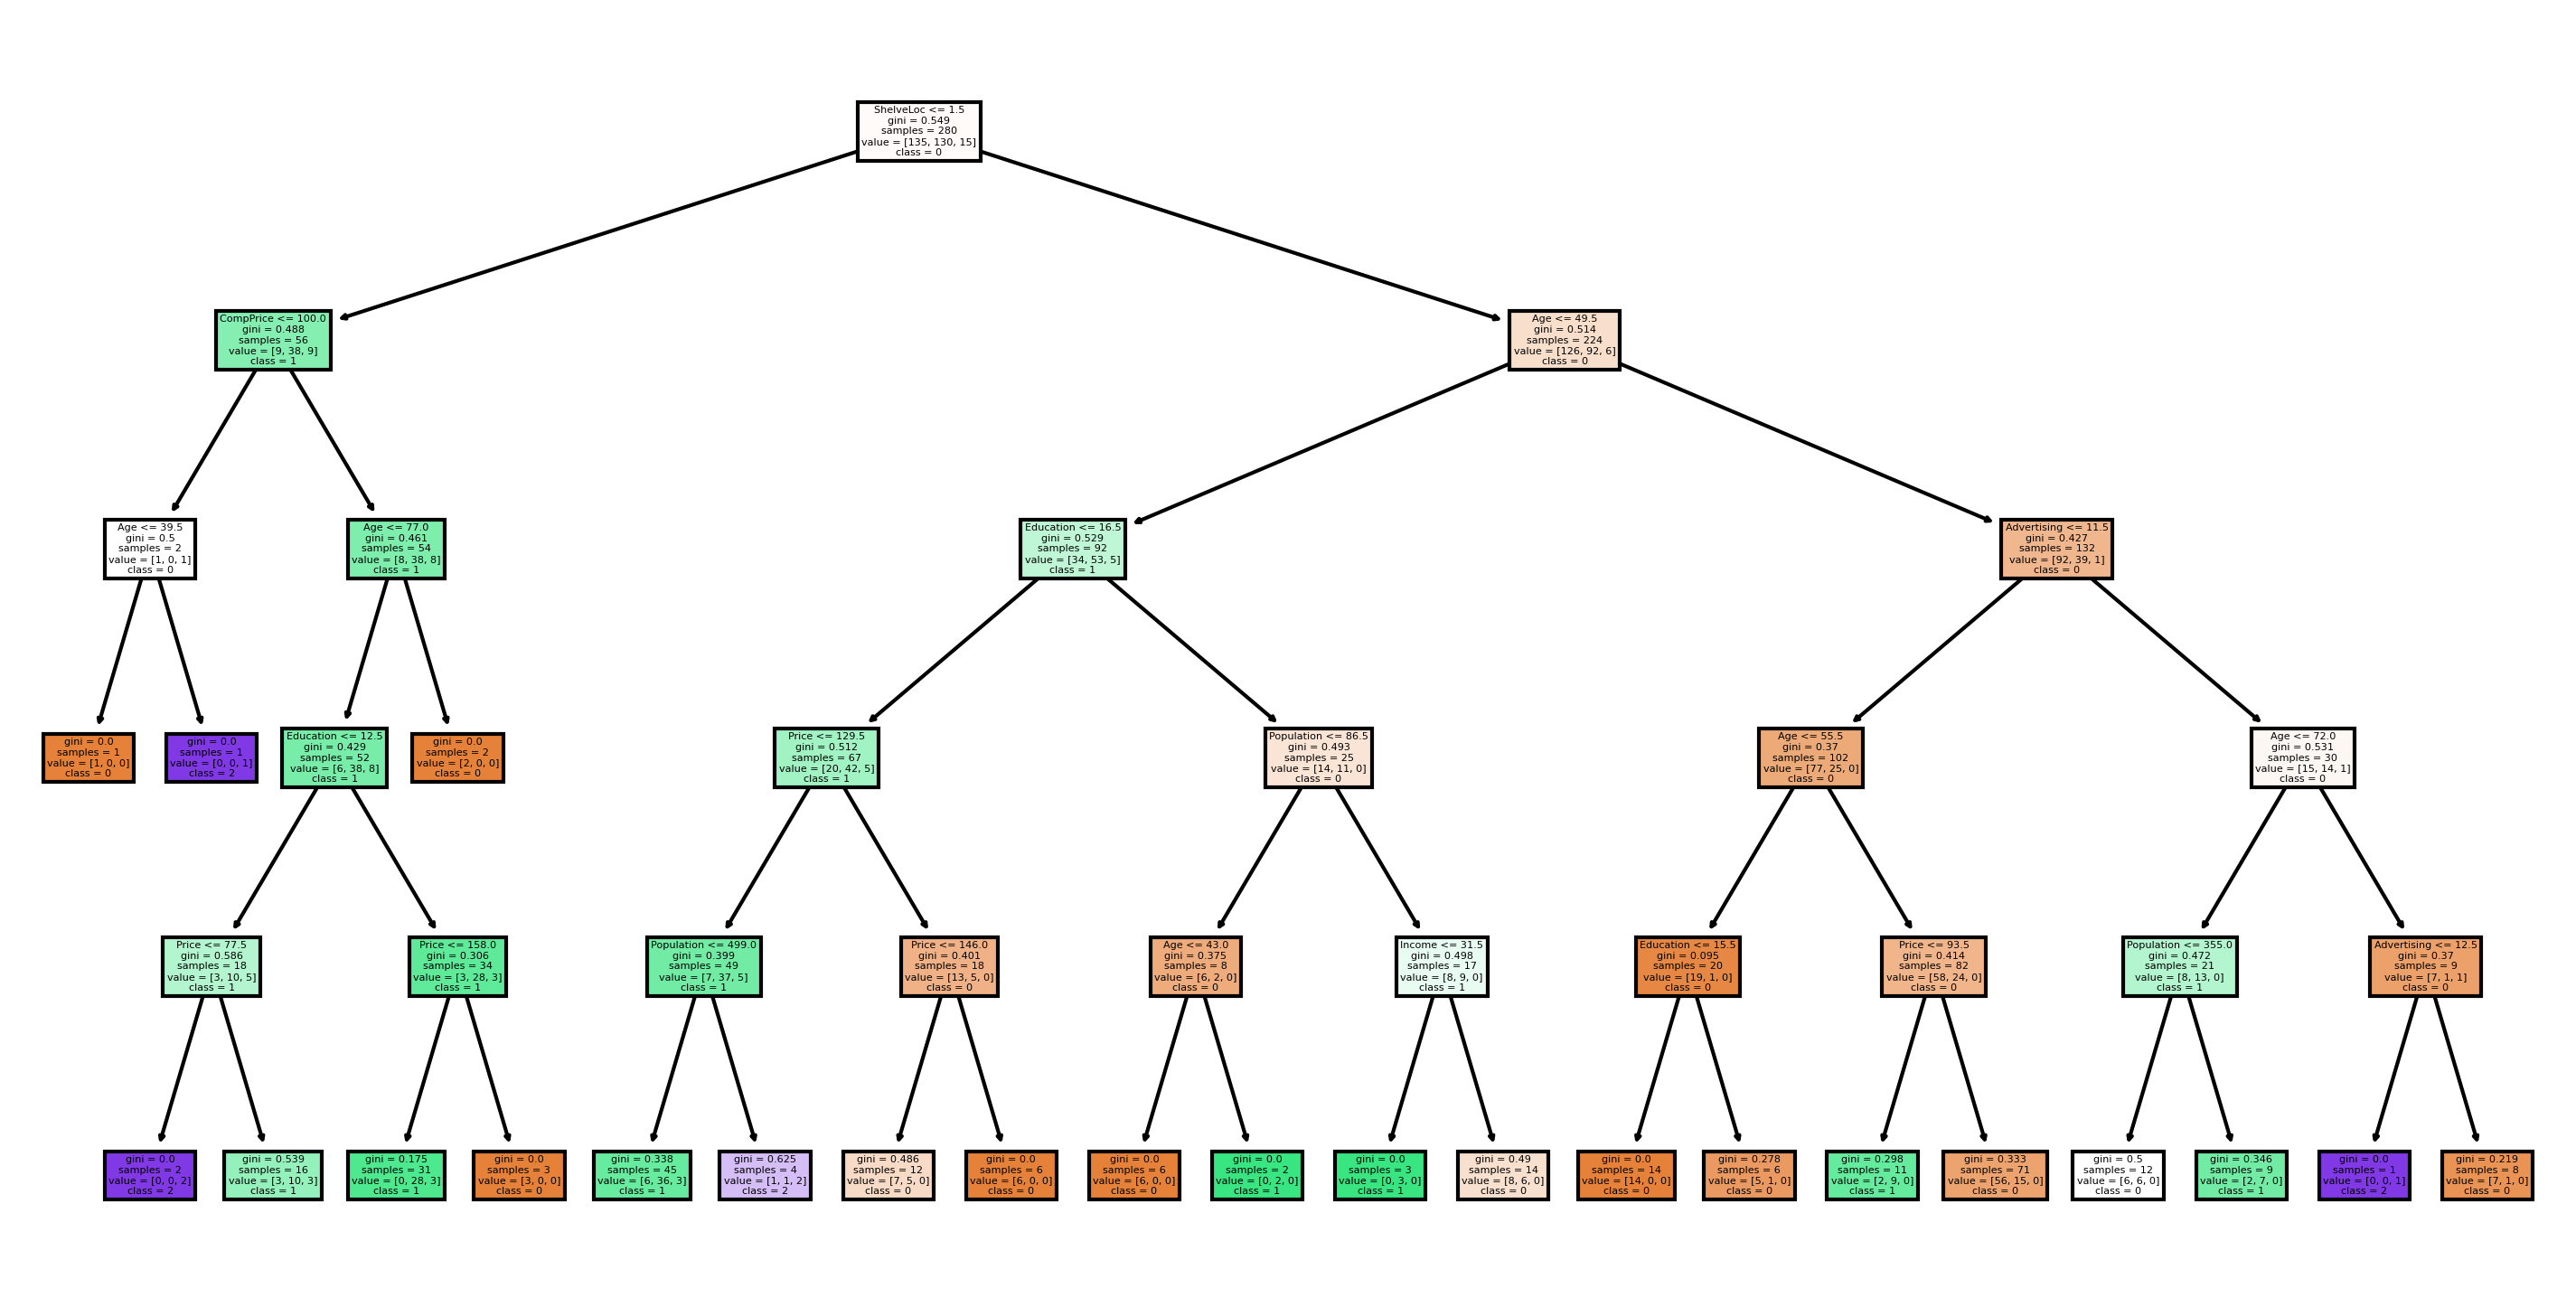

In [79]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban_Yes', 'US_Yes']
cn=['0', '1', '2']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (12,6), dpi=300)
tree.plot_tree(model_gini,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [80]:
pred=model_gini.predict(x_test)
pred
np.mean(pred==y_test)

0.6166666666666667